In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [27]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                       c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                       alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()

In [28]:
olivetti = datasets.fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target
print(X.shape)
print(y.shape)

(400, 4096)
(400,)


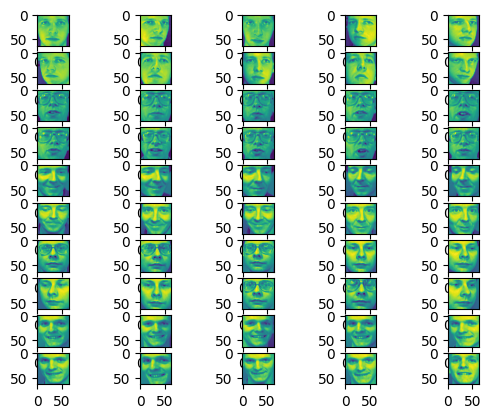

In [29]:
plt.figure()
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(X[i, :].reshape([64, 64]))

In [30]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X.min(axis=0)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
X.max(axis=0)[:10]

array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
       1.0000001, 1.0000001, 1.       , 1.       ], dtype=float32)

In [32]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(400, 2)

In [33]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims + 1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

,component_1,component_2
0,-8.850957,-0.272552
1,-2.781957,-8.145195
2,-7.607624,-1.366678
3,-4.668242,15.820342
4,-7.277632,-3.517514


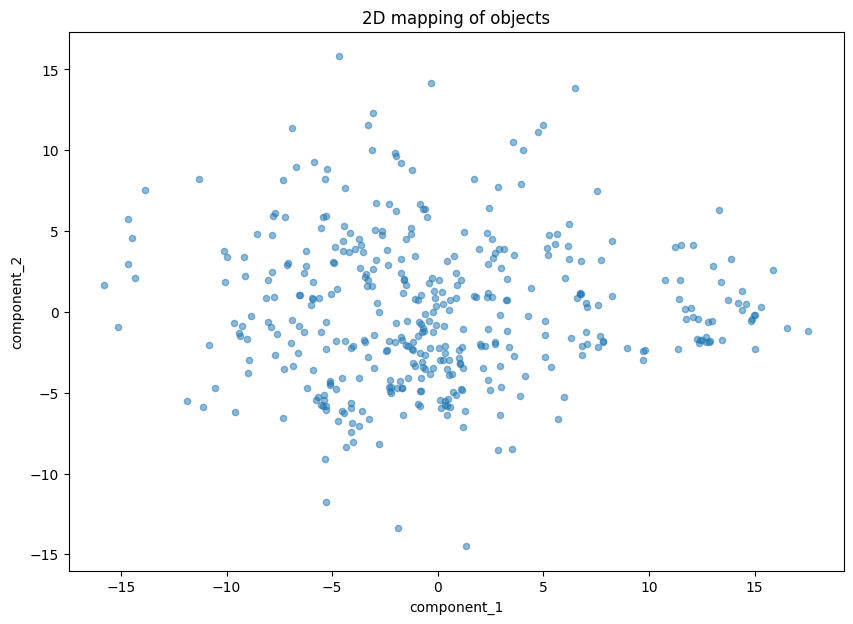

In [34]:
display_components_in_2D_space(components_X_reduced)

In [35]:
tsne = TSNE(random_state=5, perplexity=30)
X_tsne = tsne.fit_transform(X)

C:\Users\shang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [36]:
colnames = ['component_' + str(i) for i in range(1, dims + 1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

,component_1,component_2
0,-13.514597,4.175027
1,-15.746660,9.619830
2,-14.026033,3.529880
3,4.978028,12.451420
4,-14.523073,9.652241


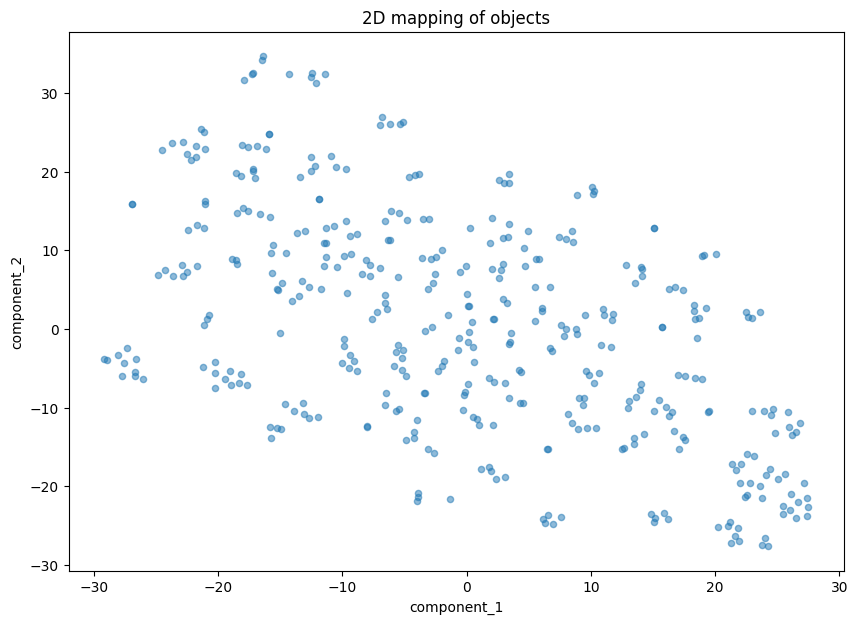

In [37]:
display_components_in_2D_space(components_X_tsne)

In [60]:
kmeans = KMeans(n_clusters=5, random_state=2)
labels_clust = kmeans.fit_predict(X)
labels_clust = pd.Series(labels_clust, name='clusters')

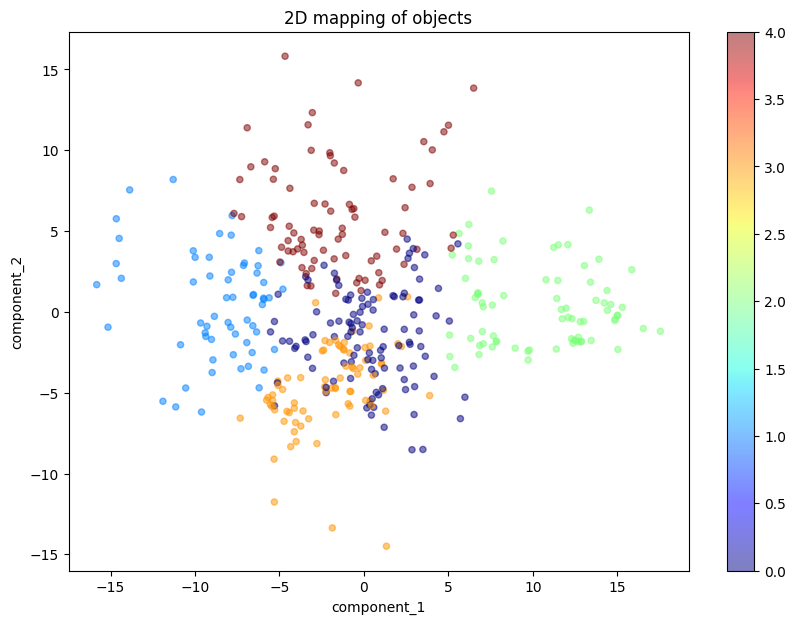

In [61]:
display_components_in_2D_space(components_X_reduced, labels=labels_clast)

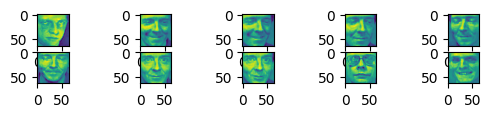

In [62]:
plt.figure()
for i in range(10):
    plt.subplot(10, 5, i + 1)
    plt.imshow(X[labels_clast == 0][i, :].reshape([64, 64]))

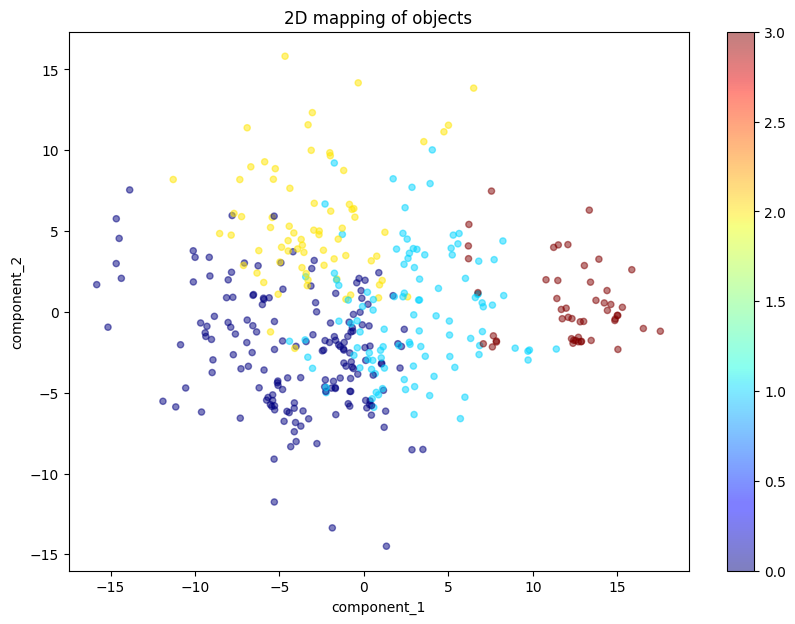

In [63]:
aggl = AgglomerativeClustering(n_clusters=4)
labels_clust_1 = aggl.fit_predict(X)
labels_clust_1 = pd.Series(labels_clust_1)
display_components_in_2D_space(components_X_reduced, labels=labels_clust_1)

Рузюме: Данный модели кластеризации показали практически идентичные результаты. Как видно из графика, очень много областей пересекаются между собой, что приводит к ложно кластеризации, и объектры одного класса могут кластеризироваться по разному.
Также понижение размерности TSNE(а вроде это не совсем модель для понижения размерности) дает нам очень много кластеров, что скорее приведет к классификации, чем к кластеризации.